In [70]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
pd.options.display.max_columns = 40

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
from data_prepare import get_data, add_features

In [139]:
%%time
X_train, X_test, features = get_data()

('Encoding ', 'NameOfPolicyProduct')
('Encoding ', 'SCID')
CPU times: user 5min 43s, sys: 7.96 s, total: 5min 50s
Wall time: 7min 1s


In [140]:
from numpy import genfromtxt
pred_pre = genfromtxt('submissions/Cantab-17-input.predict', delimiter=',')
pred_post = genfromtxt('submission.s/Cantab-19-input.predict', delimiter=',')

IOError: submission.s/Cantab-19-input.predict not found.

In [ ]:
X_test.insert(0, "pred_post", pred_post)
X_test.insert(0, "pred_pre", pred_pre)

In [ ]:
X_test[['Converted']] = X_test[['Converted']].astype(float)

In [ ]:
X_sorted = X_test.sort_values(by='user')
X_sorted['user'] = pd.factorize(X_sorted['user'])[0]
X_sorted = X_sorted.set_index('user')

In [ ]:
X_sorted

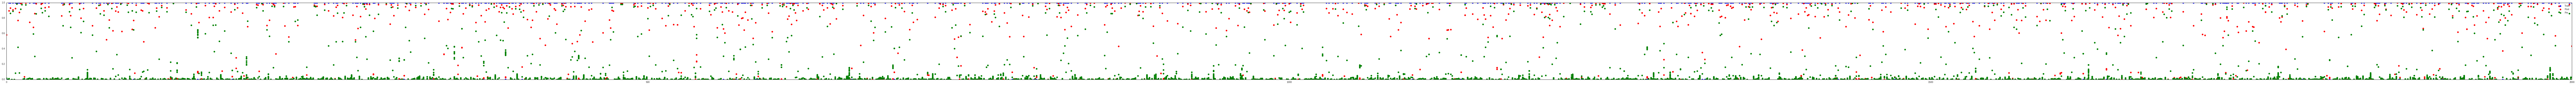

In [136]:
plt.figure(figsize=(200, 6))
plt.plot(X_sorted.loc[:2000, 'Converted'], 'bo', label="Truth");
plt.hold(True)
plt.plot(X_sorted.loc[:2000, 'pred_post'], 'ro', label='Post');
plt.plot(X_sorted.loc[:2000, 'pred_pre'], 'go', label='Pre');
plt.legend();
plt.title('Including the # quotes makes the predictions more extreme')

In [137]:
X_sorted

,pred_post,pred_pre,Converted,id,ReceivedDateTime,SCID,SelectedPackage,FirstDriverMaritalStatus,CarAnnualMileage,CarFuelId,CarUsageId,FirstDriverAge,CarInsuredValue,CarAge,FirstDriverDrivingLicenseNumberY,VoluntaryExcess,CarParkingTypeId,PolicyHolderNoClaimDiscountYears,FirstDriverDrivingLicenceType,CoverIsNoClaimDiscountSelected,CarDrivingEntitlement,CarTransmissionId,SocioDemographicId,PolicyHolderResidencyArea,AllDriversNbConvictions,TodayDate,RatedDriverNumber,IsPolicyholderAHomeowner,CarMakeId,DaysSinceCarPurchase,NameOfPolicyProduct,AffinityCodeId
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.581667,0.016667,0.0,189884,991863,273,3.0,2.0,14001.0,2.0,0.0,51.0,9001.0,5.0,30.0,150.0,2.0,7.0,1.0,0.0,2.0,1.0,58.0,28.0,0.0,42,1.0,1.0,25.0,731.0,2,63.0
1,0.000000,0.001667,0.0,141899,1535302,770,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,2,31.0
1,0.000000,0.000000,0.0,124437,1535312,794,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,10,0.0
1,0.000000,0.000000,0.0,6957,1535331,693,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,0.0,14.0,680.0,7,50.0
1,0.000000,0.000000,0.0,228824,1535303,829,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,10,0.0
1,0.000000,0.001667,0.0,184750,1535313,741,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,2,0.0
1,0.000000,0.000000,0.0,99637,1535309,712,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,11,0.0
1,0.000000,0.000000,0.0,283048,1535303,829,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,7,0.0
1,0.000000,0.001667,0.0,291330,1535414,721,3.0,2.0,9001.0,2.0,0.0,48.0,15001.0,2.0,20.0,100.0,2.0,7.0,1.0,1.0,1.0,1.0,60.0,27.0,0.0,42,1.0,1.0,14.0,680.0,2,0.0


In [89]:
X_sorted.loc[:2000, 'pred_post']

189884    0.581667
141899    0.000000
124437    0.000000
6957      0.000000
228824    0.000000
184750    0.000000
99637     0.000000
283048    0.000000
291330    0.000000
46206     0.000000
240573    0.000000
21310     0.000000
177938    0.000000
161441    0.000000
155666    0.000000
92625     0.000000
219225    0.000000
36271     0.000000
25439     0.000000
99178     0.000000
108204    0.000000
242927    0.000000
3778      0.000000
56896     0.000000
159253    0.896667
137527    0.931667
1287      0.000000
132295    0.000000
129316    0.000000
248852    0.000000
            ...   
256920    0.000000
253081    0.000000
299864    0.000000
132747    0.001667
57370     0.000000
105816    0.000000
260634    0.000000
226489    0.000000
303100    0.000000
196068    0.000000
183904    0.000000
107257    0.000000
244862    0.000000
278230    0.000000
178413    0.000000
289545    0.000000
220394    0.000000
137826    0.000000
290018    0.000000
95141     0.000000
192606    0.000000
79341     0.

In [38]:
X_test

,id,user,ReceivedDateTime,SCID,SelectedPackage,FirstDriverMaritalStatus,CarAnnualMileage,CarFuelId,CarUsageId,FirstDriverAge,CarInsuredValue,CarAge,FirstDriverDrivingLicenseNumberY,VoluntaryExcess,CarParkingTypeId,PolicyHolderNoClaimDiscountYears,FirstDriverDrivingLicenceType,CoverIsNoClaimDiscountSelected,CarDrivingEntitlement,CarTransmissionId,SocioDemographicId,PolicyHolderResidencyArea,AllDriversNbConvictions,TodayDate,RatedDriverNumber,IsPolicyholderAHomeowner,CarMakeId,DaysSinceCarPurchase,NameOfPolicyProduct,AffinityCodeId
0,0,0x94c43ba3c2ce6ed5291dcbaa86fd3fc5,721805,237,3.0,2.0,4001.0,1.0,0.0,56.0,1001.0,9.0,30.0,250.0,2.0,20.0,1.0,0.0,2.0,1.0,42.0,28.0,0.0,42,1.0,1.0,36.0,942.0,7,39.0
1,1,0xe07f462984048f4997036dcfe93091c4,1451774,581,3.0,2.0,4001.0,2.0,4.0,55.0,3001.0,10.0,24.0,250.0,1.0,8.0,1.0,0.0,1.0,1.0,30.0,22.0,0.0,42,1.0,0.0,42.0,21.0,12,0.0
2,2,0x4c59bc59bc23a00e7c9bd64c20c3b3a2,1042197,18,3.0,2.0,9001.0,1.0,0.0,44.0,1001.0,11.0,20.0,250.0,2.0,4.0,1.0,0.0,2.0,1.0,45.0,50.0,0.0,42,2.0,1.0,39.0,32.0,2,22.0
3,3,0x3b0045113940e7daafec72335ddc9db4,658306,536,3.0,2.0,8001.0,2.0,4.0,70.0,3001.0,8.0,25.0,250.0,2.0,9.0,1.0,0.0,2.0,1.0,42.0,37.0,0.0,42,1.0,1.0,42.0,3045.0,2,14.0
4,4,0xac224fc74ca238165683a715220a6cf4,118105,535,3.0,3.0,4001.0,1.0,0.0,25.0,3001.0,5.0,5.0,250.0,3.0,5.0,1.0,0.0,3.0,1.0,158.0,46.0,0.0,42,1.0,1.0,41.0,824.0,2,26.0
5,5,0xcde4b81278dc724e21c25450c246529f,292678,273,3.0,2.0,4001.0,1.0,4.0,66.0,2001.0,11.0,30.0,250.0,2.0,5.0,1.0,0.0,2.0,1.0,25.0,33.0,0.0,42,1.0,1.0,25.0,30.0,2,63.0
6,6,0x604652c7219f717784f53df17a9d63fc,30921,721,3.0,2.0,10001.0,1.0,1.0,38.0,1001.0,12.0,19.0,50.0,2.0,6.0,1.0,1.0,2.0,1.0,56.0,29.0,0.0,41,2.0,1.0,40.0,1846.0,2,0.0
7,7,0x056579e23553dab3d14f5ca03f65964f,260193,829,3.0,2.0,7001.0,2.0,0.0,44.0,2001.0,10.0,20.0,0.0,2.0,15.0,1.0,1.0,2.0,1.0,21.0,31.0,0.0,42,1.0,1.0,12.0,3111.0,2,0.0
8,8,0x53fa0e823ef7f1e07836f553001ea9a9,1102937,401,3.0,3.0,3001.0,1.0,4.0,34.0,0.0,14.0,5.0,250.0,2.0,5.0,1.0,0.0,1.0,1.0,67.0,29.0,0.0,42,1.0,1.0,41.0,32.0,2,29.0
9,9,0xd546892d144eb1d412cf8477ceff777f,1337282,525,3.0,1.0,2001.0,2.0,0.0,36.0,2001.0,8.0,15.0,100.0,3.0,4.0,1.0,0.0,4.0,1.0,58.0,47.0,0.0,42,1.0,0.0,12.0,33.0,2,38.0


In [ ]:
X_train, X_test, features = get_data()

In [6]:
data_train = X_train.join(Y_train)

In [60]:
np.sum(data_train.Converted) / len(data_train.Converted)

0.0077972843466940544

In [30]:
for i in range(10000):
    if np.sum(data_train[data_train.user == i].Converted) > 1:
        print i

5102
9513
9786


In [39]:
data_train[(data_train.user == 9513) & (data_train.Converted == 1.0)].iloc[:15,]


,user,ReceivedDateTime,SCID,SelectedPackage,FirstDriverMaritalStatus,CarAnnualMileage,CarFuelId,CarUsageId,FirstDriverAge,CarInsuredValue,...,PolicyHolderResidencyArea,AllDriversNbConvictions,TodayDate,RatedDriverNumber,IsPolicyholderAHomeowner,CarMakeId,DaysSinceCarPurchase,NameOfPolicyProduct,AffinityCodeId,Converted
9990,9513,02AUG16:21:03:33,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,...,36.0,0.0,02/08/2016,1.0,1.0,7.0,763.0,1,87.0,1.0
1871876,9513,02AUG16:20:26:15,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,...,36.0,0.0,02/08/2016,1.0,1.0,7.0,763.0,NC,3.0,1.0


In [58]:
data_train[(data_train.user == 9513)]

,user,ReceivedDateTime,SCID,SelectedPackage,FirstDriverMaritalStatus,CarAnnualMileage,CarFuelId,CarUsageId,FirstDriverAge,CarInsuredValue,CarAge,FirstDriverDrivingLicenseNumberY,VoluntaryExcess,CarParkingTypeId,PolicyHolderNoClaimDiscountYears,FirstDriverDrivingLicenceType,CoverIsNoClaimDiscountSelected,CarDrivingEntitlement,CarTransmissionId,SocioDemographicId,PolicyHolderResidencyArea,AllDriversNbConvictions,TodayDate,RatedDriverNumber,IsPolicyholderAHomeowner,CarMakeId,DaysSinceCarPurchase,NameOfPolicyProduct,AffinityCodeId,Converted
9990,9513,02AUG16:21:03:33,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,02/08/2016,1.0,1.0,7.0,763.0,1,87.0,1.0
25795,9513,2016-08-02 21:01:58.498,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,3.0,0.0
192104,9513,2016-08-02 19:52:18.932,A00192,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,22.0,0.0
346624,9513,2016-08-02 21:03:33.377,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,3.0,0.0
350305,9513,2016-08-02 21:02:02.392,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,3.0,0.0
481786,9513,2016-08-02 19:52:18.295,A10306,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,53.0,0.0
853323,9513,2016-08-02 19:52:19.130,A10385,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,55.0,0.0
1232141,9513,2016-08-02 21:03:32.033,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,3.0,0.0
1429748,9513,2016-08-02 19:52:18.420,A06439,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,29.0,0.0
1627512,9513,2016-08-02 21:01:50.685,A03228,3.0,1.0,7001.0,2.0,0.0,35.0,8001.0,4.0,18.0,100.0,2.0,9.0,1.0,0.0,4.0,1.0,56.0,36.0,0.0,2016-08-02,1.0,1.0,7.0,763.0,NC,3.0,0.0


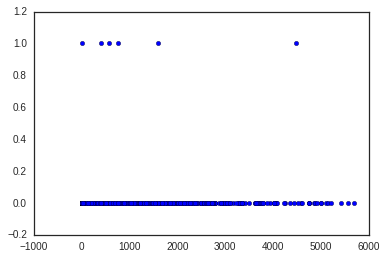

In [52]:
plt.scatter(data_train[:1000].DaysSinceCarPurchase, data_train[:1000].Converted, )

In [26]:
X_train

,Converted,user,SCID,SelectedPackage,FirstDriverMaritalStatus,CarAnnualMileage,CarFuelId,CarUsageId,FirstDriverAge,CarInsuredValue,CarAge,FirstDriverDrivingLicenseNumberY,VoluntaryExcess,CarParkingTypeId,PolicyHolderNoClaimDiscountYears,FirstDriverDrivingLicenceType,CoverIsNoClaimDiscountSelected,CarDrivingEntitlement,CarTransmissionId,SocioDemographicId,PolicyHolderResidencyArea,AllDriversNbConvictions,RatedDriverNumber,IsPolicyholderAHomeowner,CarMakeId,DaysSinceCarPurchase,NameOfPolicyProduct,AffinityCodeId,NumberQuotesFromUser
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,416.0,0,0,1
1453854,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,416.0,0,0,1
1934004,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,416.0,1,0,1
2081805,0.0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,416.0,0,1,1
2415035,0.0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0,0,0,0,0,416.0,0,0,1
2261192,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0,0,0,0,0,416.0,2,0,1
1060139,0.0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0,0,0,0,0,416.0,0,2,1
985157,0.0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,416.0,0,3,1
1459460,0.0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,0,0,0,416.0,0,1,1
666954,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0,0,0,0,0,416.0,1,0,1
